In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import locale
locale.setlocale(locale.LC_ALL, 'pt_BR')

'pt_BR'

# Carregando o dataset com as colunas necessárias

In [152]:
colunas = ['ID','Estado', 'Término Estimado', 'Término Real', 'Caminho']
dataset = pd.read_csv('atividades.csv', sep=';', index_col = 'ID', usecols = colunas, encoding = 'ISO-8859-1', low_memory = False)

In [153]:
# Removendo atividades sem término estimado
# dataset.dropna(subset = ['Término Estimado'], inplace = True)

In [154]:
dataset

,Estado,Término Estimado,Término Real,Caminho
ID,,,,
15968597,Encerrada,30/11/2020,01/12/2020,SUCESSO EM VENDAS/TREINAMENTO CONTINUO /LEO/Le...
15968598,Encerrada,24/11/2020,25/11/2020,SUCESSO EM VENDAS/TREINAMENTO CONTINUO /LEO/Le...
15968599,Encerrada,30/11/2020,01/12/2020,SUCESSO EM VENDAS/TREINAMENTO CONTINUO /LEO/Le...
15968600,Encerrada,09/12/2020,09/12/2020,SUCESSO EM VENDAS/TREINAMENTO CONTINUO /LEO/Le...
15968601,Encerrada,03/12/2020,03/12/2020,SUCESSO EM VENDAS/TREINAMENTO CONTINUO /LEO/Le...
...,...,...,...,...
17803944,Pendente,NaN,NaN,SUCESSO EM VENDAS/COMUNICAÇÃO/05-MELHORIAS DA ...
17803945,Pendente,NaN,NaN,SUCESSO EM VENDAS/COMUNICAÇÃO/05-MELHORIAS DA ...
17804316,Pendente,13/05/2021,NaN,SUCESSO EM VENDAS/01-BUSINESS INTELLIGENCE/3R'...


# Definindo o Projeto de cada atividade

In [155]:
# Função que vai procurar cada atividade no caminho
def caminhoProjeto(atividade):
    if 'Cybelar' in atividade:
        return 'Cybelar'    
    elif 'ORLETTI - Fase 2' in atividade:
        return 'Orletti Fase 2'    
    elif 'ORLETTI 3.0' in atividade:
        return 'Orletti 3.0'    
    elif 'd1000' in atividade:
        return 'd1000'    
    elif 'PANVEL' in atividade:
        return 'Panvel'    
    elif 'RN Tintas' in atividade:
        return 'RN Tintas'    
    elif 'taQi' in atividade:
        return 'TaQi'   
    elif 'TV LAR' in atividade:
        return 'TV Lar'    
    elif 'MARTINELLO' in atividade:
        return 'Martinello'    
    elif 'NISSEI' in atividade:
        return 'Nissei'    
    elif 'VALLEY' in atividade:
        return 'Valley'    
    elif 'CLAMED' in atividade:
        return 'Clamed'    
    elif 'IVAIPORÃ' in atividade:
        return 'Ivaiporã'    
    elif 'EDMIL' in atividade:
        return 'Edmil'     
    elif 'FEIRÃO' in atividade:
        return 'Feirão dos Móveis'     
    elif 'FRIGELAR' in atividade:
        return 'Frigelar'     
    elif 'LUIDAR' in atividade:
        return 'Luidar'     
    elif 'VALDAR' in atividade:
        return 'Valdar'     
    elif 'ORTHOCRIN' in atividade:
        return 'Orthocrin'     
    elif 'CASSOL' in atividade:
        return 'Cassol'     
    elif 'Supremo' in atividade:
        return 'Supremo Cimentos'     
    elif 'GUGA' in atividade:
        return 'Escola GUGA'     
    elif 'CPA' in atividade:
        return 'CPA'    
    elif 'TAPAJÓS' in atividade:
        return 'Tapajós'    
    elif 'LUCIA' in atividade:
        return 'Santa Lucia'     
    elif 'CREDIPAR' in atividade:
        return 'Credipar'
    else:
        return 'Não'

In [156]:
# Aplicando a função no dataset
dataset['Projeto'] = dataset['Caminho'].apply(lambda row: caminhoProjeto(row))
# Removendo atividades que não são de projetos
filtro = dataset['Projeto'] == 'Não'
dataset = dataset[-filtro]

In [157]:
dataset['Término Estimado'] = dataset['Término Estimado'].fillna(value = dataset['Término Real'])

<ipython-input-157-29b2147294c5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Término Estimado'] = dataset['Término Estimado'].fillna(value = dataset['Término Real'])


# Criando datasets Estimados e Realizados por projeto

In [158]:
# Transformando em tipo datetime
dataset['Término Estimado'] = pd.to_datetime(dataset['Término Estimado'], format='%d/%m/%Y')
dataset['Término Real'] = pd.to_datetime(dataset['Término Real'], format='%d/%m/%Y')

<ipython-input-158-c9c7ccb20ef6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Término Estimado'] = pd.to_datetime(dataset['Término Estimado'], format='%d/%m/%Y')
<ipython-input-158-c9c7ccb20ef6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Término Real'] = pd.to_datetime(dataset['Término Real'], format='%d/%m/%Y')


In [159]:
# Removendo outras colunas
datasetEst = dataset[['Estado', 'Término Estimado', 'Projeto']]
filtro = dataset['Estado'] == 'Encerrada'
datasetReal = dataset[filtro][['Estado', 'Término Real', 'Projeto']]

In [160]:
# Ordenando pela data
datasetEst = datasetEst.sort_values('Término Estimado')
datasetReal = datasetReal.sort_values('Término Real')

In [161]:
# Removendo valores de data em branco
datasetEst = datasetEst.dropna(subset=['Término Estimado'])
datasetReal = datasetReal.dropna(subset=['Término Real'])

In [162]:
# Removendo um dado de 2009 provavelmente errado
filtro = datasetEst['Término Estimado'] == '2009-10-02'
datasetEst = datasetEst[-filtro]

In [163]:
datasetEst

,Estado,Término Estimado,Projeto
ID,,,
17436183,Encerrada,2009-02-10,Santa Lucia
17064947,Encerrada,2020-02-25,RN Tintas
17493092,Encerrada,2020-03-31,Santa Lucia
17493103,Encerrada,2020-03-31,Santa Lucia
17493099,Encerrada,2020-03-31,Santa Lucia
...,...,...,...
17186565,Pendente,2022-10-21,RN Tintas
17186566,Pendente,2022-11-04,RN Tintas
17186567,Pendente,2022-11-18,RN Tintas


In [164]:
datasetReal

,Estado,Término Real,Projeto
ID,,,
16677683,Encerrada,2020-02-07,Valley
16690386,Encerrada,2020-07-16,Clamed
16690385,Encerrada,2020-07-27,Clamed
16178453,Encerrada,2020-07-29,Nissei
16178454,Encerrada,2020-07-29,Nissei
...,...,...,...
17492593,Encerrada,2021-03-01,Luidar
17492592,Encerrada,2021-03-01,Luidar
17492591,Encerrada,2021-03-01,Luidar


# Criando um dataset por projeto

In [165]:
projetos = dataset['Projeto'].unique()
EstimadoProjeto = []
RealProjeto = []

for projeto in projetos:
    EstimadoProjeto.append([projeto, datasetEst[datasetEst['Projeto'] == projeto]])
    
    RealProjeto.append([projeto, datasetReal[datasetReal['Projeto'] == projeto]])

# Agrupando por dia e Contando cumulativamente atividades

In [166]:
for i, projeto in enumerate(EstimadoProjeto):
    EstimadoProjeto[i][1] = EstimadoProjeto[i][1].groupby('Término Estimado', as_index = False).agg({'Estado':'count'})
    EstimadoProjeto[i][1]['Acumulado'] = EstimadoProjeto[i][1]['Estado'].cumsum()
    
    RealProjeto[i][1] = RealProjeto[i][1].groupby('Término Real', as_index = False).agg({'Estado':'count'})
    RealProjeto[i][1]['Acumulado'] = RealProjeto[i][1]['Estado'].cumsum()

In [167]:
EstimadoProjeto[i][1]

,Término Estimado,Estado,Acumulado
0,2021-02-11,20,20
1,2021-02-12,8,28
2,2021-02-16,2,30
3,2021-02-17,13,43
4,2021-02-19,4,47
...,...,...,...
89,2022-02-09,3,395
90,2022-02-16,2,397
91,2022-02-18,1,398
92,2022-03-16,1,399


# Normalizando pelo máximo de atividades estimadas

In [168]:
for i, projeto in enumerate(EstimadoProjeto):
    maximo = max(EstimadoProjeto[i][1]['Acumulado'])
    EstimadoProjeto[i][1]['Acumulado%'] = EstimadoProjeto[i][1]['Acumulado'] / maximo * 100
    RealProjeto[i][1]['Acumulado%'] = RealProjeto[i][1]['Acumulado'] / maximo * 100

# Plotando uma curva S por projeto

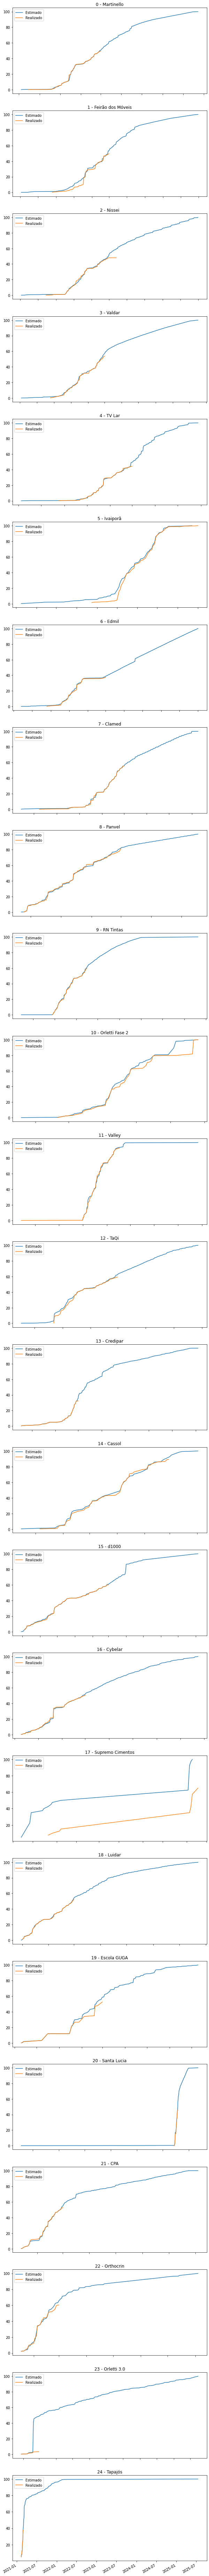

In [172]:
fig, ax = plt.subplots(len(EstimadoProjeto), 1, figsize=(10, 150))

for i, projeto in enumerate(EstimadoProjeto):
    ax[i].plot_date(x = EstimadoProjeto[i][1]['Término Estimado'], y = EstimadoProjeto[i][1]['Acumulado%'], linestyle = '-', marker='None', label = 'Estimado')
    ax[i].plot_date(x = RealProjeto[i][1]['Término Real'], y = RealProjeto[i][1]['Acumulado%'], linestyle = '-', marker='None', label = 'Realizado')
    ax[i].set_title(str(i) + ' - ' + EstimadoProjeto[i][0])
    ax[i].legend()
    #plt.xticks(rotation = 45)
    plt.gcf().autofmt_xdate()
    
plt.show()

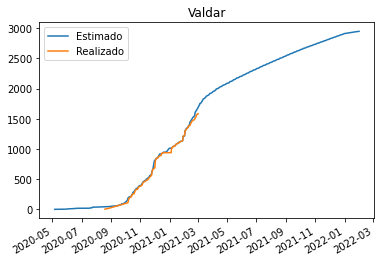

In [170]:
fig, ax = plt.subplots()
i=3
ax.plot_date(x = EstimadoProjeto[i][1]['Término Estimado'], y = EstimadoProjeto[i][1]['Acumulado'], linestyle = '-', marker='None', label = 'Estimado')
ax.plot_date(x = RealProjeto[i][1]['Término Real'], y = RealProjeto[i][1]['Acumulado'], linestyle = '-', marker='None', label = 'Realizado')
ax.set_title(EstimadoProjeto[i][0])
ax.legend()
#plt.xticks(rotation = 45)
plt.gcf().autofmt_xdate()
    
plt.show()

In [124]:
valdar = dataset[dataset['Projeto'] == 'Valdar'].sort_values('Término Real')

In [125]:
valdar

,Estado,Término Estimado,Término Real,Caminho,Projeto
ID,,,,,
16687643,Encerrada,2020-01-12,2020-01-12,SUCESSO EM VENDAS/TREINAMENTO CONTINUO /ILIVEL...,Valdar
16775673,Encerrada,2020-11-30,2020-01-12,SUCESSO EM VENDAS/TREINAMENTO CONTINUO /ILIVEL...,Valdar
16750615,Encerrada,2020-01-12,2020-01-12,SUCESSO EM VENDAS/TREINAMENTO CONTINUO /ILIVEL...,Valdar
17064163,Encerrada,2021-02-15,2020-02-12,SUCESSO EM VENDAS/TREINAMENTO CONTINUO /ILIVEL...,Valdar
17064093,Encerrada,2020-11-30,2020-02-12,SUCESSO EM VENDAS/TREINAMENTO CONTINUO /ILIVEL...,Valdar
...,...,...,...,...,...
17784373,Pendente,2021-01-03,NaT,SUCESSO EM VENDAS/TREINAMENTO CONTINUO /ILIVEL...,Valdar
17784474,Pendente,2021-01-03,NaT,SUCESSO EM VENDAS/TREINAMENTO CONTINUO /ILIVEL...,Valdar
17784583,Pendente,2021-01-03,NaT,SUCESSO EM VENDAS/TREINAMENTO CONTINUO /ILIVEL...,Valdar


In [126]:
valdar[valdar['Término Real'] < valdar['Término Estimado']]

,Estado,Término Estimado,Término Real,Caminho,Projeto
ID,,,,,
16775673,Encerrada,2020-11-30,2020-01-12,SUCESSO EM VENDAS/TREINAMENTO CONTINUO /ILIVEL...,Valdar
17064163,Encerrada,2021-02-15,2020-02-12,SUCESSO EM VENDAS/TREINAMENTO CONTINUO /ILIVEL...,Valdar
17064093,Encerrada,2020-11-30,2020-02-12,SUCESSO EM VENDAS/TREINAMENTO CONTINUO /ILIVEL...,Valdar
17064092,Encerrada,2020-11-30,2020-02-12,SUCESSO EM VENDAS/TREINAMENTO CONTINUO /ILIVEL...,Valdar
17064091,Encerrada,2020-11-30,2020-02-12,SUCESSO EM VENDAS/TREINAMENTO CONTINUO /ILIVEL...,Valdar
...,...,...,...,...,...
17444110,Encerrada,2021-09-02,2021-08-02,SUCESSO EM VENDAS/TREINAMENTO CONTINUO /ILIVEL...,Valdar
17667198,Encerrada,2021-12-02,2021-08-02,SUCESSO EM VENDAS/TREINAMENTO CONTINUO /ILIVEL...,Valdar
17444008,Encerrada,2021-09-02,2021-08-02,SUCESSO EM VENDAS/TREINAMENTO CONTINUO /ILIVEL...,Valdar


In [133]:
valdar['Término Real'].dt.month

ID
16687643    1.0
16775673    1.0
16750615    1.0
17064163    2.0
17064093    2.0
           ... 
17784373    NaN
17784474    NaN
17784583    NaN
17798207    NaN
17803643    NaN
Name: Término Real, Length: 3962, dtype: float64